# Ensemble Methods Exercise (5 points)

Import the file `planes.csv` from the data folder as a pandas dataframe called features. The dataset has information about different types of airplanes, including the number of tails, year of production, type, manufacturer, model, number of engines, seat, speed, and engine type. 

In this exercise, we are going to train a classifier to predict the engine type based on the provided information.

In [1]:
# Your code 
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

planes = pd.read_csv('data/planes.csv')
planes.info()
planes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tailnum       3322 non-null   object 
 1   year          3252 non-null   float64
 2   type          3322 non-null   object 
 3   manufacturer  3322 non-null   object 
 4   model         3322 non-null   object 
 5   engines       3322 non-null   int64  
 6   seats         3322 non-null   int64  
 7   speed         23 non-null     float64
 8   engine        3322 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 233.7+ KB


,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


## Exploratory Data Analysis

Perform a brief Exploratory Data Analysis. Display summary statistics, handle missing values (if the number of missing values is less than 100 remove those rows), if needed remove unnecessary columns, check the data distribution, and report if there are correlated features.

In [2]:
# Your code here
planes.isnull().sum()
planes.dropna(subset=['year'], axis=0, inplace=True)
del  planes['speed']
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,Turbo-fan


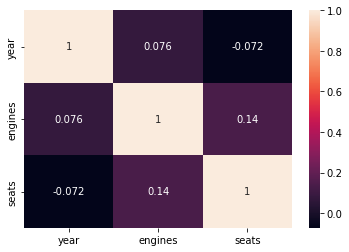

In [3]:
correlation = planes.corr()
correlation
sns.heatmap(correlation, annot=True)
plt.show()

## Data Preparation

Encode the categorical features in the dataset into ordinal features using the Ordinal Encoder, use ordinal encoding with the Label Encoder for the column `engine` as target labels, and normalize the data to the range [0,1]. Display the shape of the data and target.

In [4]:
# Your code here
from sklearn.preprocessing import OrdinalEncoder

categs_feats = planes[['tailnum', 'type','manufacturer','model']]

encoder = OrdinalEncoder()

categs_encoded = encoder.fit_transform(categs_feats)
planes[['tailnum', 'type','manufacturer','model']] = pd.DataFrame(categs_encoded, columns=categs_feats.columns, index=categs_feats.index)

planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,engine
0,0.0,2004.0,0.0,15.0,102.0,2,55,Turbo-fan
1,1.0,1998.0,0.0,2.0,83.0,2,182,Turbo-fan
2,2.0,1999.0,0.0,2.0,83.0,2,182,Turbo-fan
3,3.0,1999.0,0.0,2.0,83.0,2,182,Turbo-fan
4,4.0,2002.0,0.0,15.0,101.0,2,55,Turbo-fan


In [5]:
from sklearn.preprocessing import LabelEncoder
embtown_feat = planes[['engine']]
label_encoder = LabelEncoder()
embtown_encoded = label_encoder.fit_transform(embtown_feat)

planes['engine'] = pd.DataFrame(embtown_encoded, columns=embtown_feat.columns, index=embtown_feat.index)


planes['engine'].value_counts()

/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2    2697
3     526
1      21
5       5
4       2
0       1
Name: engine, dtype: int64

In [6]:
index = planes[planes['engine'] == 0 ].index
planes.drop(index, axis = 0, inplace=True)
planes['engine'].value_counts()

2    2697
3     526
1      21
5       5
4       2
Name: engine, dtype: int64

In [7]:
X = planes.drop('engine', axis=1)
y = planes['engine']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(planes)

planes_std = scaler.transform(planes)
X = scaler.fit_transform(X)

planes_std[:5]

array([[0.00000000e+00, 8.42105263e-01, 0.00000000e+00, 5.55555556e-01,
        8.50000000e-01, 3.33333333e-01, 1.18303571e-01, 2.50000000e-01],
       [3.07597662e-04, 7.36842105e-01, 0.00000000e+00, 7.40740741e-02,
        6.91666667e-01, 3.33333333e-01, 4.01785714e-01, 2.50000000e-01],
       [6.15195325e-04, 7.54385965e-01, 0.00000000e+00, 7.40740741e-02,
        6.91666667e-01, 3.33333333e-01, 4.01785714e-01, 2.50000000e-01],
       [9.22792987e-04, 7.54385965e-01, 0.00000000e+00, 7.40740741e-02,
        6.91666667e-01, 3.33333333e-01, 4.01785714e-01, 2.50000000e-01],
       [1.23039065e-03, 8.07017544e-01, 0.00000000e+00, 5.55555556e-01,
        8.41666667e-01, 3.33333333e-01, 1.18303571e-01, 2.50000000e-01]])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, stratify=y)

print('Training data inputs', X_train.shape)
print('Training labels', y_train.shape)
print('Testing data inputs', X_test.shape)
print('Testing labels', y_test.shape)

Training data inputs (2438, 7)
Training labels (2438,)
Testing data inputs (813, 7)
Testing labels (813,)


## Voting Ensemble

Train a hard voting ensemble using k-Nearest Neighbors, SVM, and Logistic Regression, and **compare the accuracy of the ensemble to the individual classifiers**.

You can use the default values for the models, you don't need to perform fine-tuning.

Differently from the examples in the lecture notes on Ensemble Methods, use a 5-fold cross-validation. This means that you don't need to split the data into train and test sets, as this will be performed by the cross_validate function in scikit-learn. 

Report the mean and standard distribution of the accuracy scores for the 5-fold cross validation. 

***Use the same approach with 5-fold cross-validation for all models in this exercise***. 

You may get warnings for some of the models, so if you wish you can ignore the warnings with the following lines.

```
import warnings
warnings.filterwarnings('ignore')
```

In [9]:
# Your code here
from sklearn import neighbors

knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
accuracy = knn_model.score(X_test, y_test)
print('The test accuracy of k-Nearest Neighbors is {0:5.2f} %'.format(accuracy*100))

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)
print('Logistic Regression accuracy is {0:5.2f} %'.format(lr_acc*100))

from sklearn.svm import SVC

poly_svm = SVC(kernel='poly')
poly_svm.fit(X_train, y_train)
polysvm_pred = poly_svm.predict(X_test)
SVM_acc = accuracy_score(y_test, polysvm_pred)
print('SVM accuracy is {0:5.2f} %'.format(SVM_acc*100))


The test accuracy of k-Nearest Neighbors is 97.05 %
Logistic Regression accuracy is 82.16 %
SVM accuracy is 85.36 %


In [10]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(
    
    estimators=[('log_reg', lr_model),
                ('knn', knn_model),
                ('svm', poly_svm)], 
    voting='hard')

voting_classifier.fit(X_train, y_train)
voting_preds = voting_classifier.predict(X_test)
voting_acc = accuracy_score(y_test, voting_preds)
print('Voting Ensemble accuracy is {0:7.4f} %'.format(voting_acc*100))

Voting Ensemble accuracy is 87.2079 %


In [11]:
from sklearn.model_selection import cross_validate
lr_model = LogisticRegression()
cv_result = cross_validate(lr_model, X_train, y_train, cv=5)
scores = cv_result["test_score"]
print("The mean cross-validation accuracy of lr is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)
cv_result = cross_validate(knn_model, X_train, y_train, cv=5)
scores = cv_result["test_score"]
print("The mean cross-validation accuracy of knn is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

poly_svm = SVC(kernel='poly')
cv_result = cross_validate(poly_svm, X_train, y_train, cv=5)
scores = cv_result["test_score"]
print("The mean cross-validation accuracy of SVM is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy of lr is: 0.820 +/- 0.006


/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


The mean cross-validation accuracy of knn is: 0.974 +/- 0.005


/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


The mean cross-validation accuracy of SVM is: 0.857 +/- 0.010


Add SGD and Naive Bayes classifiers to the three models above, and report the results of the hard Voting Ensemble with the five individual models. Are there any improvements?

In [12]:
# Your code here\
from sklearn.linear_model import SGDClassifier

sgd_model_1 = SGDClassifier(max_iter=80, loss='hinge', random_state=1)

sgd_model_1 .fit(X_train, y_train)

sgd_pred = sgd_model_1 .predict(X_test)

accuracy = accuracy_score(y_test, sgd_pred)
print('The SGD test accuracy is {0:5.2f} %'.format(accuracy*100))

from sklearn.naive_bayes import GaussianNB

nb_model_1 = GaussianNB()

nb_model_1.fit(X_train, y_train)

nb_pred = nb_model_1.predict(X_test)

accuracy = accuracy_score(y_test, nb_pred)
print('The  naive bayes test accuracy is {0:5.2f} %'.format(accuracy*100))


voting_classifier = VotingClassifier(
    
    estimators=[('log_reg', lr_model),
                ('knn', knn_model),
                ('sgd',sgd_model_1),
                ('nb', nb_model_1),
                ('svm', poly_svm)], 
    voting='hard')

voting_classifier.fit(X_train, y_train)
voting_preds = voting_classifier.predict(X_test)
voting_acc = accuracy_score(y_test, voting_preds)
print('Hard Voting Ensemble accuracy is {0:7.4f} %'.format(voting_acc*100))


The SGD test accuracy is 83.27 %
The  naive bayes test accuracy is 83.27 %
Hard Voting Ensemble accuracy is 83.2718 %


Train a soft Voting Ensemble using 3 individual models of your choice, and compare the results to the hard Voting Ensemble model. Are the results as expected?

In [13]:
# Your code here
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)
lr_model = LogisticRegression()
poly_svm = SVC(kernel='poly', probability=True)

voting_classifier_soft = VotingClassifier(
    
    estimators=[('log_reg', lr_model),
                ('knn', knn_model),
                ('svm', poly_svm)], 
     voting='soft')

voting_classifier_soft.fit(X_train, y_train)
voting_preds = voting_classifier_soft.predict(X_test)
voting_acc = accuracy_score(y_test, voting_preds)
print('Soft Voting Ensemble accuracy is {0:7.4f} %'.format(voting_acc*100))


Soft Voting Ensemble accuracy is 93.6039 %


## Bagging Ensemble

Train two Bagging Ensembles, one with bootstrapping and one with pasting, and compare the results. You can use the same hyperparameters as in the examples in the lecture notes.

In [14]:
# Your code here
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_classifier = BaggingClassifier(
      DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5, max_features=0.5, bootstrap=True)
bagging_classifier.fit(X_train, y_train)
bagging_preds = bagging_classifier.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_preds)
print('Bootstrapping Bagging Ensemble accuracy is {0:7.4f} %'.format(bagging_acc*100))

bagging_classifier2 = BaggingClassifier(
      DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5, max_features=0.5, bootstrap=False)
bagging_classifier2.fit(X_train, y_train)
bagging_preds = bagging_classifier2.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_preds)
print('Pasting Bagging Ensemble accuracy is {0:7.4f} %'.format(bagging_acc*100))

Bootstrapping Bagging Ensemble accuracy is 97.1710 %
Pasting Bagging Ensemble accuracy is 98.6470 %


Perform a grid search for the better of these two ensembles, by using the following percentages of used data instances: 10%, 30%, 50%, 80%, and 100%. 

In [15]:
# Your code here
from sklearn.model_selection import GridSearchCV

bagging_classifier2 = BaggingClassifier(
      DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5, max_features=0.5, bootstrap=False)

# Create grid of hyperparameter values
hyper_grid = {'max_samples': [0.1, 0.3, 0.5, 0.8, 1.0]}

# Tune a knn model using grid search
grid_search = GridSearchCV(bagging_classifier2, hyper_grid, scoring='accuracy')
results = grid_search.fit(X_train, y_train)
print(results.best_score_)
print(results.best_params_)

/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.9872807755747803
{'max_samples': 1.0}


## Boosting Ensemble

Train Boosting Ensembles using Gradient Boosting, AdaBoost, and XGBoost ensembles, and compare the results. Don't forget to use 5-fold cross-validation with all models. 

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_classifier = GradientBoostingClassifier(
                        n_estimators=500, 
                        learning_rate=0.8, 
                        random_state=42,
                        max_depth=2)

grad_boost_classifier.fit(X_train, y_train)
gboost_preds = grad_boost_classifier.predict(X_test)
gboost_acc = accuracy_score(y_test, gboost_preds)
print('Gradient Boosting Ensemble accuracy is {0:7.4f} %'.format(gboost_acc*100))

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost_classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'), 
    n_estimators=300,
    learning_rate=0.5)

adaboost_classifier.fit(X_train, y_train)
adaboost_preds = adaboost_classifier.predict(X_test)
adaboost_acc = accuracy_score(y_test, adaboost_preds)
print('AdaBoost Ensemble accuracy is {0:7.4f} %'.format(adaboost_acc*100))

import xgboost as xgb
#i dont know why no have model of xgboost
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgboost_preds = xgb_classifier.predict(X_test)
xgboost_acc = accuracy_score(y_test, xgboost_preds)
print('XGBoost Ensemble accuracy is {0:7.4f} %'.format(xgboost_acc*100))

Gradient Boosting Ensemble accuracy is 97.4170 %
AdaBoost Ensemble accuracy is 90.7749 %


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
grad_boost_classifier = GradientBoostingClassifier(
                        n_estimators=500, 
                        learning_rate=0.8, 
                        random_state=42,
                        max_depth=2)
cv_result = cross_validate(grad_boost_classifier, X_train, y_train, cv=5)
scores = cv_result["test_score"]
print("The mean cross-validation accuracy of grad_boost is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

adaboost_classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'), 
    n_estimators=300,
    learning_rate=0.5)
cv_result = cross_validate(adaboost_classifier, X_train, y_train, cv=5)
scores = cv_result["test_score"]
print("The mean cross-validation accuracy of adaboost is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

## Stacking Ensemble

Train a Stacking Ensemble with Random Forest and SVM Classifier as base estimators, and Logistic Regression as the final estimator. 

In [18]:
# Your code here
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

base_estimators = [
    ('rand', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42))]

final_estimator = LogisticRegression()

stack_classifier = StackingClassifier(estimators = base_estimators, 
                               final_estimator = final_estimator)

stack_classifier.fit(X_train, y_train)
stack_preds = stack_classifier.predict(X_test)
stack_acc = accuracy_score(y_test, stack_preds)
print('Stacking Ensemble accuracy is {0:7.4f} %'.format(stack_acc*100))

/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1097: RuntimeWarning: Number of classes in training fold (4) does not match total number of classes (5). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  RuntimeWarning,
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1097: RuntimeWarning: Number of classes in training fold (4) does not match total number of classes (5). Results may not be ap

Stacking Ensemble accuracy is  0.6150 %


/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

Train two other Stacking Ensembles using other classifiers of your choice as the final estimator.

In [19]:
# Your code here
base_estimators = [
    ('rand', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42))]

final_estimator =  neighbors.KNeighborsClassifier(n_neighbors=5)

stack_classifier = StackingClassifier(estimators = base_estimators, 
                               final_estimator = final_estimator)

stack_classifier.fit(X_train, y_train)
stack_preds = stack_classifier.predict(X_test)
stack_acc = accuracy_score(y_test, stack_preds)
print('Stacking Ensemble accuracy2 is {0:7.4f} %'.format(stack_acc*100))

base_estimators = [
    ('rand', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42))]

final_estimator =   GaussianNB()

stack_classifier = StackingClassifier(estimators = base_estimators, 
                               final_estimator = final_estimator)

stack_classifier.fit(X_train, y_train)
stack_preds = stack_classifier.predict(X_test)
stack_acc = accuracy_score(y_test, stack_preds)
print('Stacking Ensemble accuracy3 is {0:7.4f} %'.format(stack_acc*100))

/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1097: RuntimeWarning: Number of classes in training fold (4) does not match total number of classes (5). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  RuntimeWarning,
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1097: RuntimeWarning: Number of classes in training fold (4) does not match total number of classes (5). Results may not be ap

Stacking Ensemble accuracy2 is 98.6470 %


/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1097: RuntimeWarning: Number of classes in training fold (4) does not match total number of classes (5). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  RuntimeWarning,
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1097: RuntimeWarning: Number of classes in training fold (4) does not match total number of classes (5). Results may not be ap

Stacking Ensemble accuracy3 is  0.6150 %


/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:192: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:490: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:490: RuntimeWarning: overflow encountered in square
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]),

Train another Stacking Ensemble with Random Forest and XGBoost as base estimators, and Logistic Regression as the final estimator, and compare the results.

In [20]:
# Your code here
#still same problem
base_estimators = [
    ('rand', RandomForestClassifier(random_state=42)),
    ('xgb', xgb.XGBClassifier())]

final_estimator =  LogisticRegression()

stack_classifier = StackingClassifier(estimators = base_estimators, 
                               final_estimator = final_estimator)

stack_classifier.fit(X_train, y_train)
stack_preds = stack_classifier.predict(X_test)
stack_acc = accuracy_score(y_test, stack_preds)
print('Stacking Ensemble accuracy2 is {0:7.4f} %'.format(stack_acc*100))

NameError: name 'xgb' is not defined